# Prediction of Scores using Supervised Machine Learning

### Objective:
- Predict the percentage of a student based on the no. of hours using Linear Regression algorithm

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Read Data](#Read_Data)**
3. **[Data Analysis](#data_preparation)**
    - 3.1 - [Understand the Data](#Data_Understanding)
        - 3.1.1 - [Data Dimension](#Data_Shape)
        - 3.1.2 - [Data Types](#Data_Types)
        - 3.1.3 - [Summary Statistics](#Summary_Statistics)
        - 3.1.4 - [Missing Values](#Missing_Values)
        - 3.1.5 - [Correlation](#correlation)
        - 3.1.6 - [Discover Outliers](#outliers)
    - 3.2 [Univariate Analysis](#univariate)
    - 3.3 [Bivariate Analysis](#bivariate)
4. **[Train-Test split](#train_test)**
5. **[Linear Regression (training the model)](#linear_regression)**
6. **[Predicting the percentage of a student based on the no. of hours](#predict)**
7. **[Model Performance](#performmance)**

<a id='import_lib'></a>
### 1.Importing required libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

<a id='Read_Data'></a>
### 2.Understand the Dataset

In [3]:
#Reading the dataset
df = pd.read_csv("http://bit.ly/w-data")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<a id='data_preparation'></a>
### 3. Data Analysis

<a id='Data_Shape'></a>
#### 3.1.1 Data Dimension

In [4]:
#Number of rows and columns
df.shape

(25, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<a id='Data_Types'></a>
#### 3.1.2 Data Types

In [12]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

<a id='Summary_Statistics'></a>
#### 3.1.3 Summary statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


<a id='Missing_Values'></a>
#### 3.1.4 Missing Values

In [14]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

<a id='correlation'></a>
#### 3.1.5 Correlation

In [7]:
#Let's check the correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
#Hours is highly correlated with Scores

<a id='outliers'></a>
#### 3.1.6 Outliers

In [27]:
#we can use boxplots to visualize the outliers
def boxplot(data,col,size):
    plt.figure(figsize=size)
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

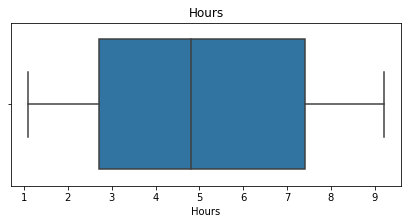

In [24]:
boxplot(df,'Hours',(7,3))

In [ ]:
#there are no outliers in hours column

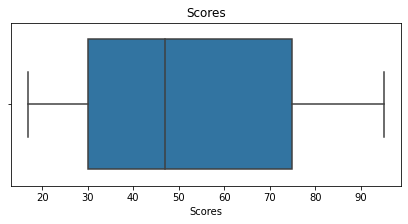

In [25]:
boxplot(df,'Scores',(7,3))

In [26]:
#there are no outliers in Scores column

<a id='univariate'></a>
### 3.2 Univariate Analysis

In [28]:
def distplot(data,col,size):
    plt.figure(figsize=size)
    sns.distplot(data[col])
    plt.title(col)
    plt.show()

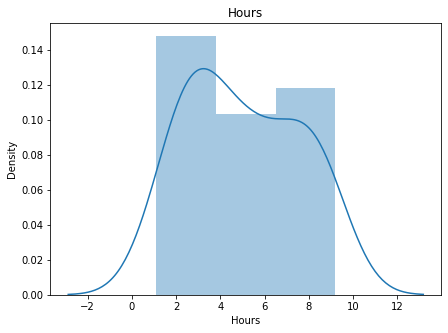

In [30]:
distplot(df,'Hours',(7,5))

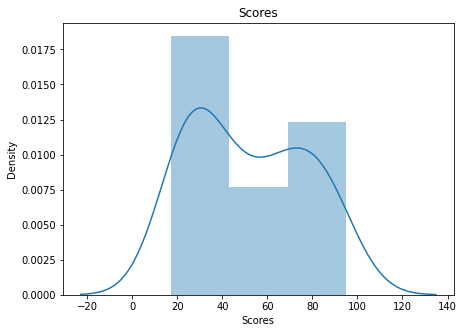

In [31]:
distplot(df,'Scores',(7,5))

In [ ]:
#Both variables are normally distributed

<a id='bivariate'></a>
### 3.3 Bivariate Analysis

In [47]:
#lets define a function to plot a scatterplot
def scatter(data,x_col,y_col,size):
    print(f'Scatter Plot for {x_col} vs {y_col}')
    plt.figure(figsize=size)
    sns.scatterplot(x=x_col,y=y_col,data=data)
    plt.grid()
    plt.show()

Scatter Plot for Hours vs Scores


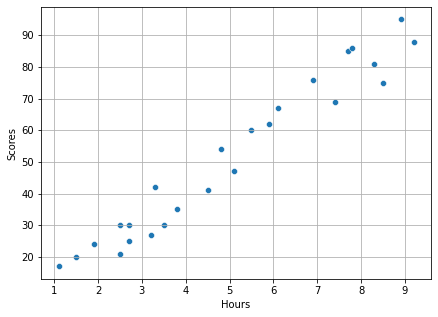

In [48]:
scatter(df,'Hours','Scores',(7,5))

In [ ]:
#Hours is positively correlated with scores

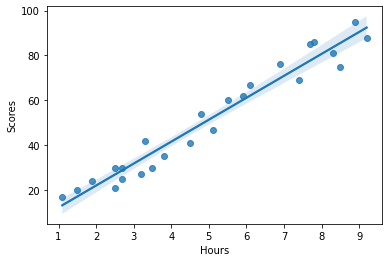

In [51]:
#regression plot
sns.regplot(df['Hours'],df['Scores'])
plt.show()

<a id='train_test'></a>
### 4. Train Test Split

In [45]:
X=df[['Hours']]
y=df['Scores']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
print('x_train Shape',x_train.shape)
print('x_test Shape',x_test.shape)
print('y_train Shape',y_train.shape)
print('y_test Shape',y_test.shape)

x_train Shape (20, 1)
x_test Shape (5, 1)
y_train Shape (20,)
y_test Shape (5,)


<a id='linear_regression'></a>
### 5. Linear Regression (Training the model)

In [52]:
#training the model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

<a id='predict'></a>
### 6. What will be the predicted score if the students studied 9.25hours/day?

In [65]:
predicted_score=round(list(model.predict(pd.DataFrame({'Hours':[9.25]})))[0],2)
predicted_score

93.69

In [79]:
print(f'The Score of the students if they studied 9.25hours/day is: {predicted_score}%')

The Score of the students if they studied 9.25hours/day is: 93.69%


In [69]:
#predicting the scores of test data
predicted_scores_test_data=model.predict(x_test)
predicted_scores_test_data=[round(val,2) for val in predicted_scores_test_data]
df_predicted=pd.DataFrame({'Hours':x_test['Hours'],'actual_scores':y_test,'Predicted_scores':predicted_scores_test_data})
df_predicted

,Hours,actual_scores,Predicted_scores
5,1.5,20,16.88
2,3.2,27,33.73
19,7.4,69,75.36
16,2.5,30,26.79
11,5.9,62,60.49


<a id='performmance'></a>
### 7. Model Performance

In [70]:
from sklearn import metrics

In [77]:
#Checking the Performace of the model
ypred_train_lr=model.predict(x_train)
ypred_test_lr=model.predict(x_test)
train_rmse_lr=round(np.sqrt(mean_squared_error(y_train,ypred_train_lr)),2)
test_rmse_lr=round(np.sqrt(mean_squared_error(y_test,ypred_test_lr)),2)
print('Mean Absolute Error of Train Data:', round(metrics.mean_absolute_error(y_train,ypred_train_lr),2)) 
print('Mean Absolute Error: Test Data', round(metrics.mean_absolute_error(y_test,ypred_test_lr),2)) 
print('\n')
print(f'Root Mean Squared Error of Train data: {train_rmse_lr}')
print(f'Root Mean Squared Error of Test data: {test_rmse_lr}')

Mean Absolute Error of Train Data: 5.19
Mean Absolute Error: Test Data 4.18


Root Mean Squared Error of Train data: 5.56
Root Mean Squared Error of Test data: 4.65
